In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Baca data dari file CSV
data = pd.read_csv("london_crime_by_lsoa.csv")
data.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [7]:
# Informasi umum
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [8]:
# Cek missing values
missing_values = data.isnull().sum()
print(missing_values)

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


In [14]:
data.describe(exclude = 'O').transpose()

,count,mean,std,min,25%,50%,75%,max
value,13490604.0,0.477944,1.771513,0.0,0.00,0.0,1.00,309.0
year,13490604.0,2012.000000,2.581989,2008.0,2010.00,2012.0,2014.00,2016.0
month,13490604.0,6.500000,3.452053,1.0,3.75,6.5,9.25,12.0


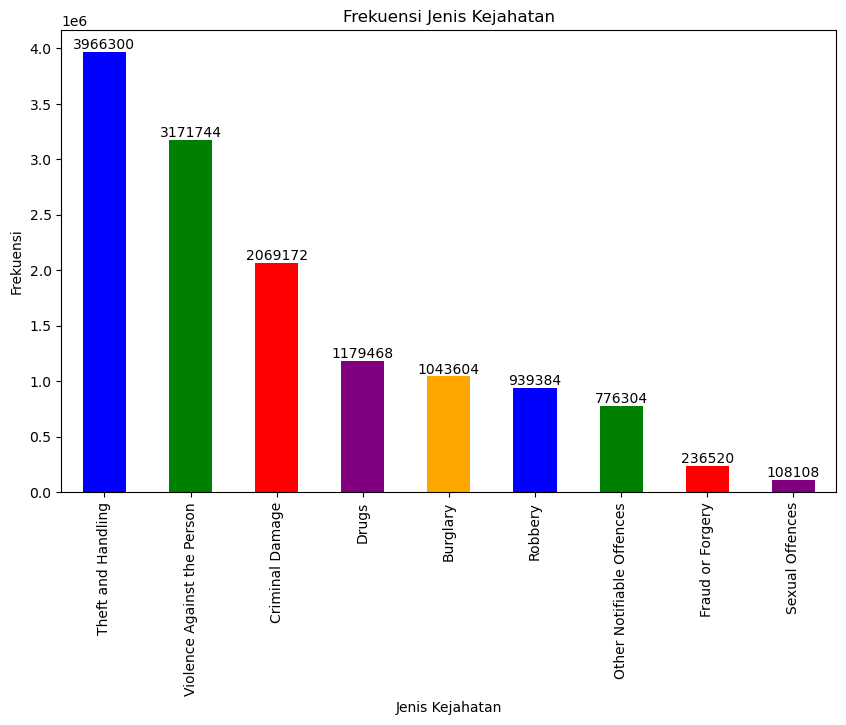

In [16]:
# Menghitung jumlah frekuensi setiap nilai di kolom 'major_category' dan membuat grafik bar
value_counts = data['major_category'].value_counts()

# Mengatur warna batang
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Ganti dengan warna sesuai keinginan

# Membuat grafik bar
plt.figure(figsize=(10, 6))
bars = value_counts.plot(kind='bar', color=colors)
plt.title('Frekuensi Jenis Kejahatan')
plt.xlabel('Jenis Kejahatan')
plt.ylabel('Frekuensi')

# Menambahkan nilai di atas setiap bar
for i, v in enumerate(value_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

In [52]:
# Mengelompokan data nama-nama daerah atau borough yang ada dalam kolom 'borough'
crime_per_borough = data.groupby('borough')['value'].sum().reset_index()
crime_per_borough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   borough  33 non-null     object
 1   value    33 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 656.0+ bytes


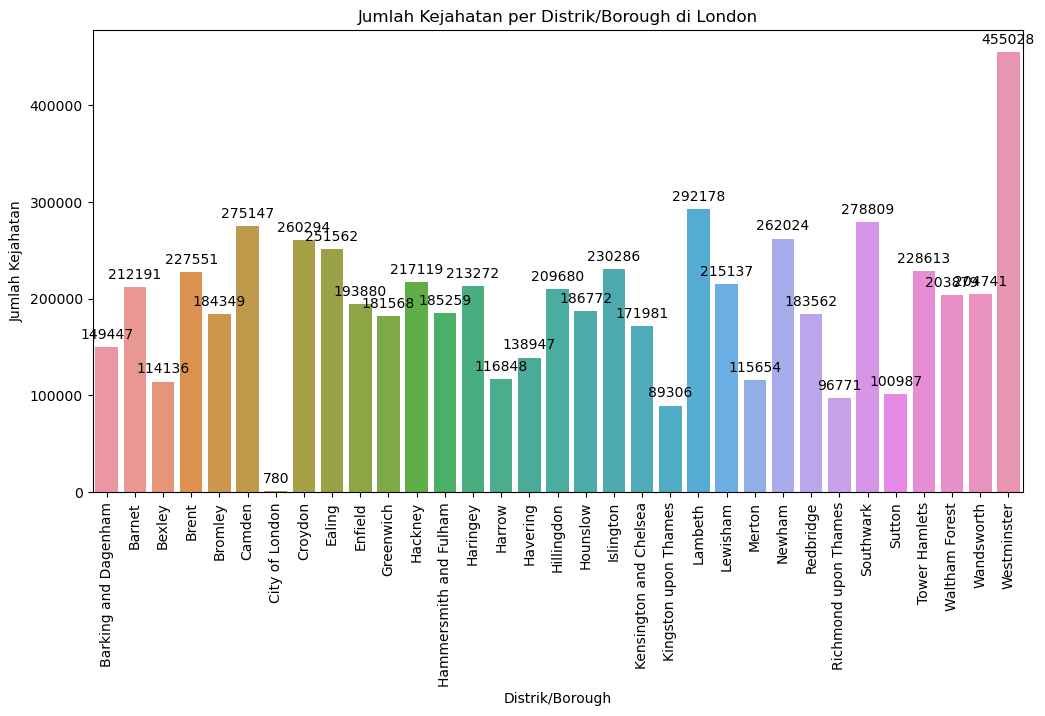

In [53]:
# Membuat grafik bar
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=crime_per_borough, x='borough', y='value')
plt.title('Jumlah Kejahatan per Distrik/Borough di London')
plt.xticks(rotation=90)
plt.xlabel('Distrik/Borough')
plt.ylabel('Jumlah Kejahatan')

# Menambahkan teks pada setiap batang grafik
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.show()


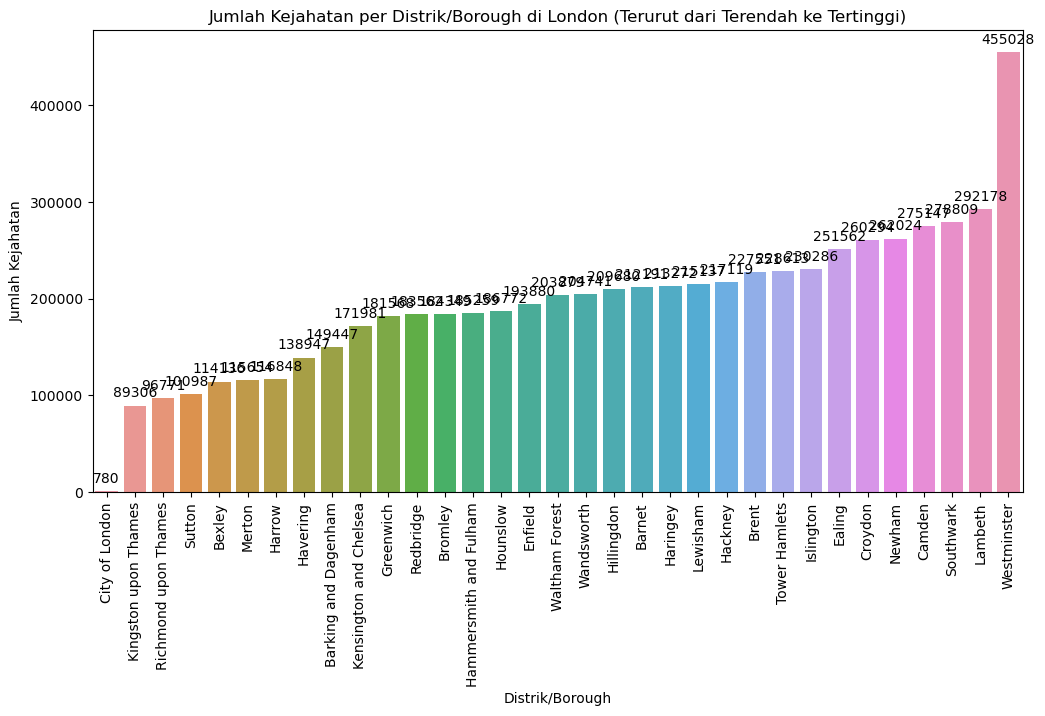

In [36]:
# Mengurutkan data berdasarkan jumlah kejahatan (value) dari yang terendah ke tertinggi
crime_per_borough_sorted = crime_per_borough.sort_values(by='value')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=crime_per_borough_sorted, x='borough', y='value')
plt.title('Jumlah Kejahatan per Distrik/Borough di London (Terurut dari Terendah ke Tertinggi)')
plt.xticks(rotation=90)
plt.xlabel('Distrik/Borough')
plt.ylabel('Jumlah Kejahatan')

#Menambahkan nlai pada setiap batang grafik
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

# Karena datanya susah untuk di baca jadi meggunakan bar plot yang kesamping

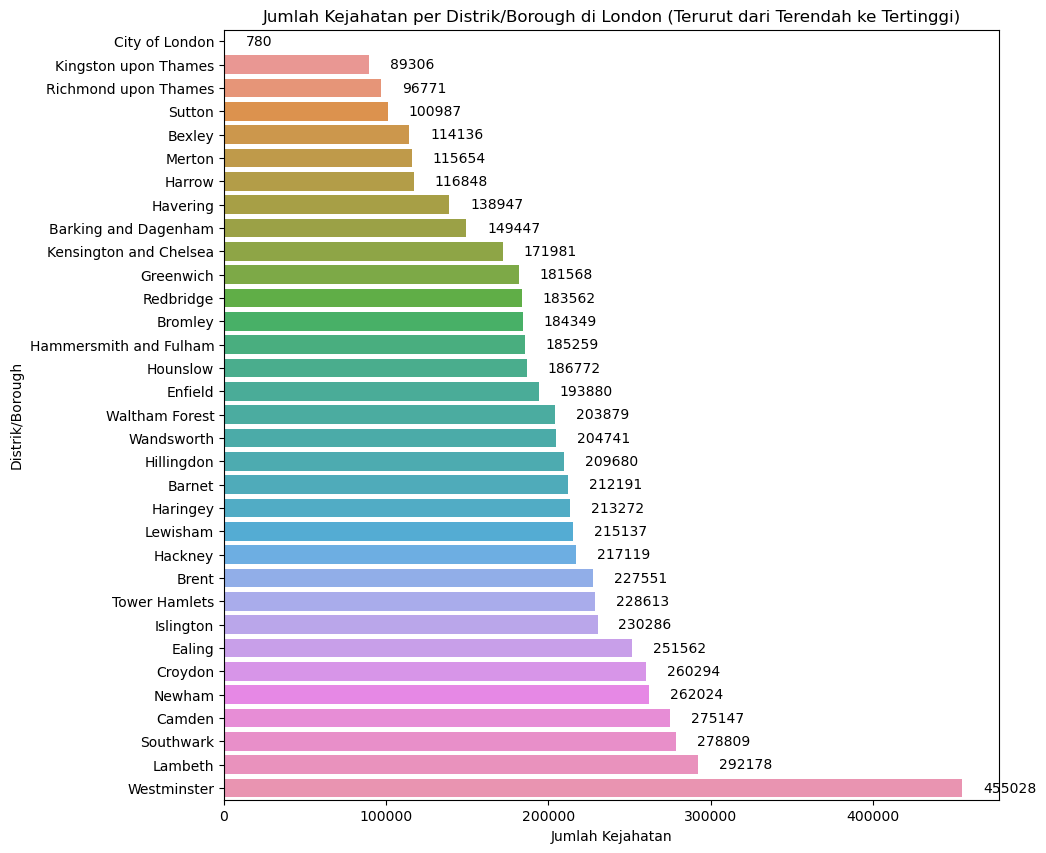

In [54]:
crime_per_borough_sorted = crime_per_borough.sort_values(by='value')

plt.figure(figsize=(10, 10))  # ukuran grafik 
ax = sns.barplot(data=crime_per_borough_sorted, x='value', y='borough', orient='h')  # Mengatur orientasi menjadi horizontal
plt.title('Jumlah Kejahatan per Distrik/Borough di London (Terurut dari Terendah ke Tertinggi)')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Distrik/Borough')
plt.xticks(rotation=0)  #rotasi label sumbu x sesuai kebutuhan

# Menambahkan nilai pada setiap batang grafik
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2), va='center', xytext=(15, 0),
                textcoords='offset points')

plt.show()


Penambahan %tase data agar membantu melihat data

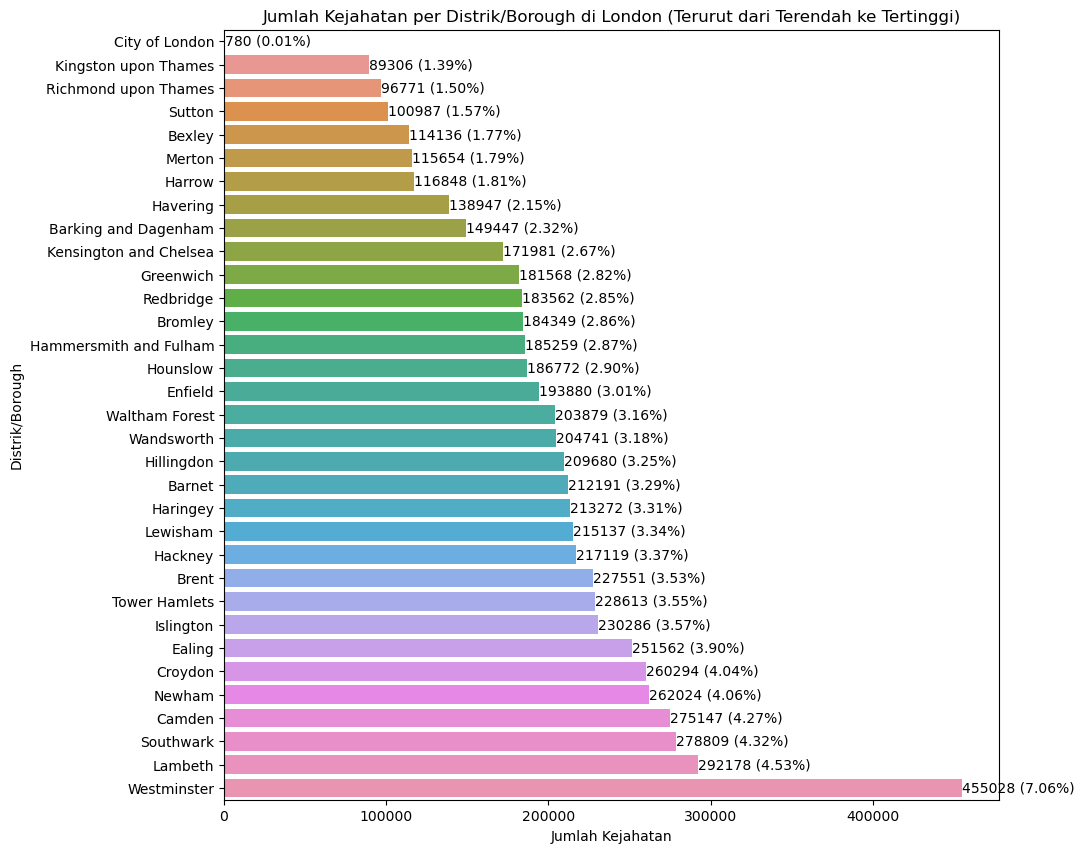

In [24]:
# Menghitung persentase kejahatan
total_crimes = crime_per_borough_sorted['value'].sum()
crime_per_borough_sorted['percentage'] = (crime_per_borough_sorted['value'] / total_crimes) * 100

# Membuat grafik bar horizontal
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=crime_per_borough_sorted, x='value', y='borough', orient='h')
plt.title('Jumlah Kejahatan per Distrik/Borough di London (Terurut dari Terendah ke Tertinggi)')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Distrik/Borough')
plt.xticks(rotation=0)

# Menambahkan nilai dan persentase pada setiap bar grafik
for p in ax.patches:
    width = p.get_width()
    label_text = f'{int(width)} ({crime_per_borough_sorted[crime_per_borough_sorted["value"] == width]["percentage"].values[0]:.2f}%)'
    plt.text(width, p.get_y() + p.get_height() / 2, label_text, va='center', fontsize=10)

plt.show()

Westminster Merupakan Distrik yang paling banyak terdapat kejahatan.

In [181]:
# Menghitung total jumlah kejahatan untuk setiap tahun
crime_by_year = data.groupby('year')['value'].sum().reset_index()
crime_by_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


In [182]:
# Mengidentifikasi tahun dengan jumlah kejahatan tertinggi
year_with_most_crimes = crime_by_year.loc[crime_by_year['value'].idxmax()]
year_with_most_crimes

year       2008
value    738641
Name: 0, dtype: int64

Karna khawatir typo dalam penulisan nama daerah, saya munculkan uniq datanya agar bisa di copas

In [23]:
# Menampilkan data unik dalam kolom 'borough'
unique_boroughs = data['borough'].unique()
print(unique_boroughs)

['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


# Brakdown data pada Westminster, karena terdapat kejahatan paling tinggi dari Distrik yang lain

- Munculkan kejahatan apa saja yang terjadi pada Distrik Westminster
- Lengkapi chart dengan peresentase data
- Mengurutkan data dari yang terkecil dan paling tinggi

In [37]:
# Filter data untuk daerah "Westminster"
westminster_data = data[data['borough'] == 'Westminster']
westminster_data

,lsoa_code,borough,major_category,minor_category,value,year,month
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
46,E01004678,Westminster,Criminal Damage,Other Criminal Damage,0,2008,11
74,E01032513,Westminster,Violence Against the Person,Wounding/GBH,0,2009,9
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4
165,E01004677,Westminster,Theft and Handling,Other Theft Person,0,2015,10
...,...,...,...,...,...,...,...
13490302,E01004711,Westminster,Violence Against the Person,Assault with Injury,1,2015,6
13490346,E01004724,Westminster,Theft and Handling,Theft From Shops,1,2008,9
13490386,E01004654,Westminster,Robbery,Personal Property,0,2009,12
13490545,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6


In [38]:
# Menghitung total kejahatan di Westminster
total_crimes = westminster_data['value'].sum()
total_crimes

455028

In [47]:
# Menghitung jumlah kejahatan per jenis kejahatan di Westminster
crime_by_major_category = westminster_data.groupby('major_category')['value'].sum().reset_index()
crime_by_major_category

,major_category,value
0,Burglary,29295
1,Criminal Damage,20405
2,Drugs,34031
3,Fraud or Forgery,273
4,Other Notifiable Offences,6148
5,Robbery,15752
6,Sexual Offences,59
7,Theft and Handling,277617
8,Violence Against the Person,71448


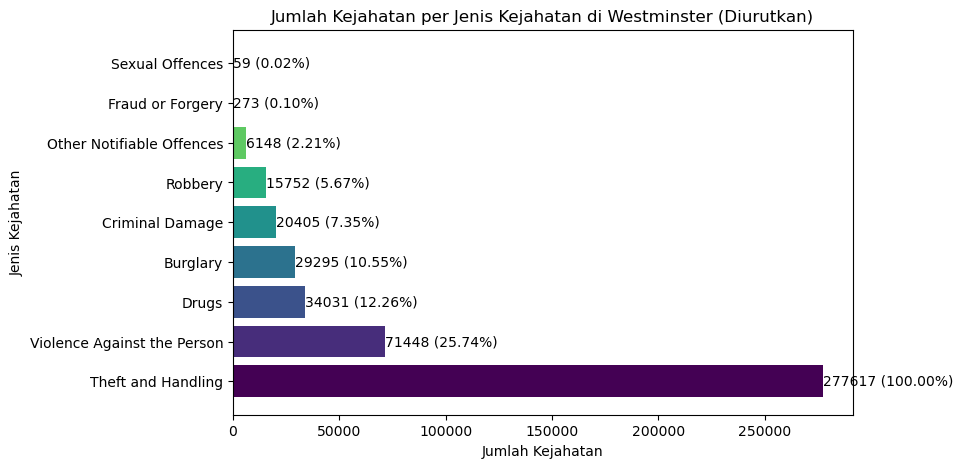

In [149]:
# Menghitung persentase kejahatan per jenis kejahatan di Westminster
crime_by_major_category['percentage'] = (crime_by_major_category['value'] / total_crimes) * 100

# Mengurutkan data
crime_by_major_category = crime_by_major_category.sort_values(by='value', ascending=False)

# Membuat warna menggunakan colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(crime_by_major_category)))

# Membuat grafik batang horizontal
plt.figure(figsize=(8, 5))
bars = plt.barh(crime_by_major_category['major_category'], crime_by_major_category['value'], color=colors)
plt.title('Jumlah Kejahatan per Jenis Kejahatan di Westminster (Diurutkan)')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Jenis Kejahatan')

# Menambahkan label jumlah kejahatan dan persentase pada batang grafik
for i, (value, percentage) in enumerate(zip(crime_by_major_category['value'], crime_by_major_category['percentage'])):
    label_text = f'{value} ({percentage:.2f}%)'
    plt.text(value, i, label_text, va='center')

plt.show()


Dari Hasil di atas terlihat bahwa pada westminster terdapat Theft and Handling paling besar yaitu (61.01%)


# Breakdown data Theft di Westminster
- Pada Tahun berapakejadia terbanyak ?
- pada tahun terbanyak lihat lebih detail bulan apa yang terbanyak
- lihat Minor ketegori yang terjadi apa saja

In [65]:
# Filter data untuk distrik Westminster dan jenis kejahatan "Theft and Handling"
westminster_theft_data = data[(data['borough'] == 'Westminster') & (data['major_category'] == 'Theft and Handling')]
westminster_theft_data

,lsoa_code,borough,major_category,minor_category,value,year,month
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4
165,E01004677,Westminster,Theft and Handling,Other Theft Person,0,2015,10
187,E01004654,Westminster,Theft and Handling,Theft From Motor Vehicle,3,2013,2
227,E01004750,Westminster,Theft and Handling,Theft From Motor Vehicle,6,2016,8
...,...,...,...,...,...,...,...
13490016,E01004724,Westminster,Theft and Handling,Handling Stolen Goods,0,2010,9
13490133,E01004718,Westminster,Theft and Handling,Other Theft,2,2016,4
13490346,E01004724,Westminster,Theft and Handling,Theft From Shops,1,2008,9
13490545,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6


In [73]:
# Mengelompokkan data berdasarkan tahun dan menghitung total kejahatan per tahun
theft_by_year = westminster_theft_data.groupby('year')['value'].sum().reset_index()
theft_by_year

,year,value
0,2008,29266
1,2009,29967
2,2010,29191
3,2011,33529
4,2012,38152
5,2013,33868
6,2014,28144
7,2015,27980
8,2016,27520


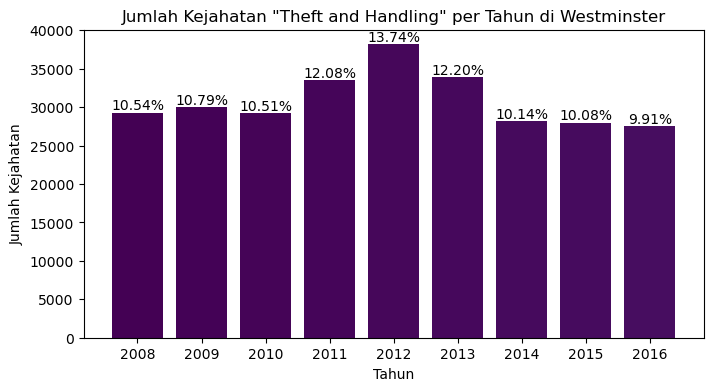

In [162]:
# Menghitung persentase kejahatan per tahun
total_crimes = theft_by_year['value'].sum()
theft_by_year['percentage'] = (theft_by_year['value'] / total_crimes) * 100

# Membuat warna menggunakan colormap
colors = plt.cm.viridis(range(len(theft_by_year)))

# Membuat grafik batang vertikal
plt.figure(figsize=(8, 4))
bars = plt.bar(theft_by_year['year'], theft_by_year['value'], color=colors)
plt.title('Jumlah Kejahatan "Theft and Handling" per Tahun di Westminster')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')

# Menambahkan label persentase di atas masing-masing batang
for bar, percentage in zip(bars, theft_by_year['percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

plt.xticks(theft_by_year['year'])
plt.show()

In [76]:
# Filter data untuk distrik Westminster, jenis kejahatan "Theft and Handling," dan tahun 2012
theft_2012 = westminster_theft_data[westminster_theft_data['year'] == 2012]
theft_2012

,lsoa_code,borough,major_category,minor_category,value,year,month
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
785,E01004669,Westminster,Theft and Handling,Other Theft,1,2012,7
2168,E01004752,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,1,2012,3
2597,E01033598,Westminster,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2012,2
3950,E01004727,Westminster,Theft and Handling,Other Theft,5,2012,2
...,...,...,...,...,...,...,...
13487823,E01004700,Westminster,Theft and Handling,Other Theft,1,2012,4
13487907,E01004656,Westminster,Theft and Handling,Theft From Motor Vehicle,0,2012,4
13489146,E01004739,Westminster,Theft and Handling,Theft From Shops,0,2012,1
13489599,E01004711,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,0,2012,10


In [101]:
# Mengelompokkan data berdasarkan bulan dan menghitung jumlah kejahatan
theft_by_month_2012 = theft_2012.groupby('month')['value'].sum().reset_index()
theft_by_month_2012

,month,value
0,1,3339
1,2,2757
2,3,3484
3,4,2885
4,5,3253
5,6,3163
6,7,3501
7,8,3109
8,9,2708
9,10,3188


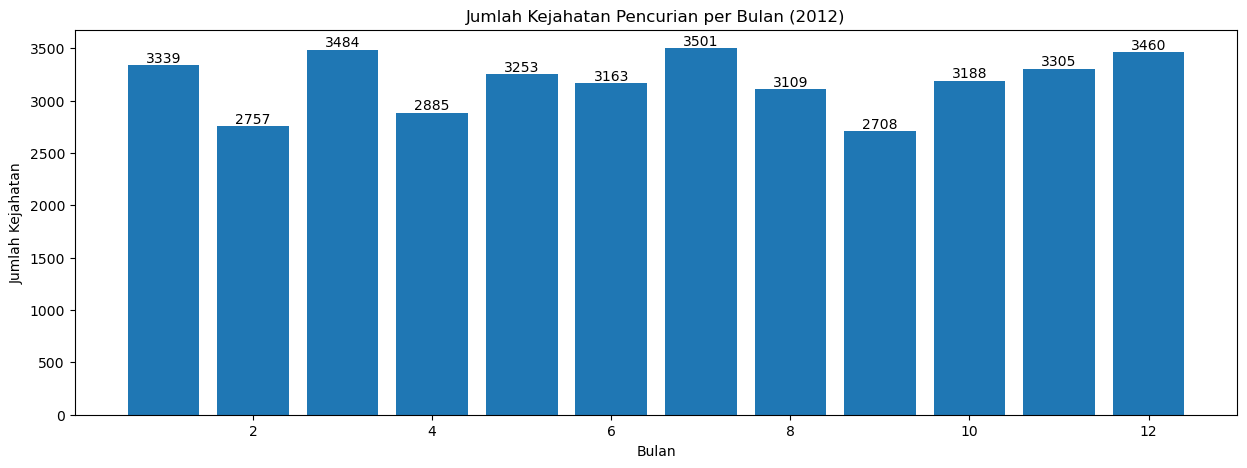

,6,2,11,0,10,4,9,5,7,3,1,8
month,7,3,12,1,11,5,10,6,8,4,2,9
value,3501,3484,3460,3339,3305,3253,3188,3163,3109,2885,2757,2708


In [184]:
# Urutkan DataFrame theft_by_month_2012 berdasarkan 'value' dari terendah ke tertinggi (ini gatau kenapaga jalan)
theft_by_month_2012 = theft_by_month_2012.sort_values(by='value', ascending=False)

# Membuat bar chart
plt.figure(figsize=(15, 5))
bars = plt.bar(theft_by_month_2012['month'], theft_by_month_2012['value'])

# Menambahkan label pada setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Menambahkan label pada sumbu-sumbu
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejahatan')
plt.title('Jumlah Kejahatan Pencurian per Bulan (2012)')

# Menampilkan bar chart
plt.show()

theft_by_month_2012.transpose()

Bulan 7 merupakan bulan paling banyak terjadi kejahatan 

In [135]:
# melihat minor category yang terjadi di 2012
minor_category_2012 = theft_2012.groupby('minor_category')['value'].sum().reset_index()
minor_category_2012

,minor_category,value
0,Handling Stolen Goods,104
1,Motor Vehicle Interference & Tampering,125
2,Other Theft,19556
3,Other Theft Person,9228
4,Theft From Motor Vehicle,2519
5,Theft From Shops,4378
6,Theft/Taking Of Motor Vehicle,586
7,Theft/Taking of Pedal Cycle,1656


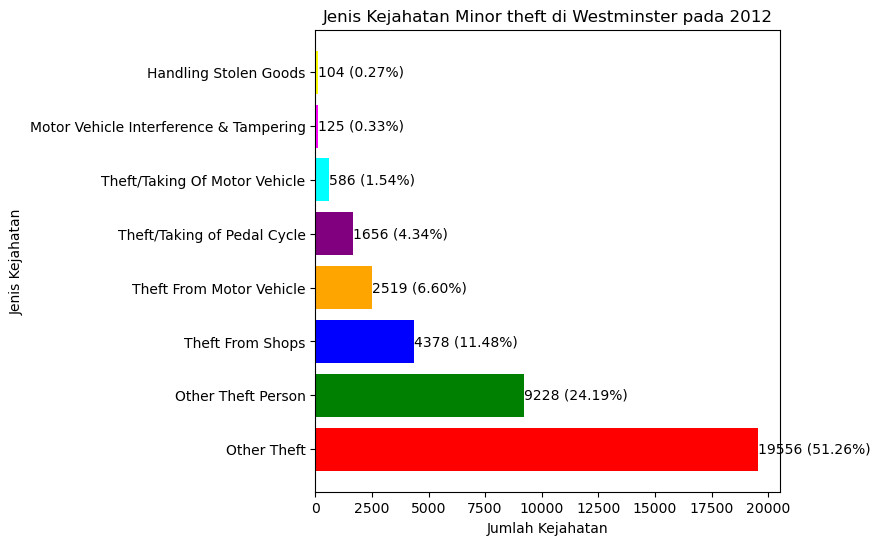

In [163]:
# Menghitung persentase
theft_2012 = minor_category_2012['value'].sum()
minor_category_2012['percentage'] = (minor_category_2012['value'] / theft_2012) * 100

# Mengurutkan data
minor_category_2012 = minor_category_2012.sort_values(by='value', ascending=False)

# Membuat warna menggunakan colormap
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Membuat grafik batang horizontal
plt.figure(figsize=(6, 6))
bars = plt.barh(minor_category_2012['minor_category'], minor_category_2012['value'], color=colors)
plt.title('Jenis Kejahatan Minor theft di Westminster pada 2012')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Jenis Kejahatan')

# Menambahkan label jumlah kejahatan dan persentase pada batang grafik
for i, (value, percentage) in enumerate(zip(minor_category_2012['value'], minor_category_2012['percentage'])):
    label_text = f'{value} ({percentage:.2f}%)'
    plt.text(value, i, label_text, va='center')

plt.show()

# Konklusi singkat   

Pada Distrik (Westminster), Theft and Handling dan Violence Against the Person adalah dua kategori utama dengan jumlah kejahatan yang signifikan, dan perlu mendapatkan perhatian khusus dalam upaya penanganan dan pencegahan kejahatan. 

Selain itu, Drugs, Burglary, dan Criminal Damage juga memiliki jumlah kejahatan yang cukup tinggi dan harus dipertimbangkan dalam upaya peningkatan keamanan dan penegakan hukum.

jika kita lihat lebi dalam pada data Distrik Westminster terdapat detai sebagai berikut :
- Kejahatan paling tinggi terjadi pada 2012 sebesar (13.74%)
- Dan terjadi pada bulan 7 sebanyak 3501
- Other Theft yang terjadi sebesar 51,25%
- Other Theft Person sebesar 24.19 %